In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install transformers

In [3]:
from transformers import GPT2LMHeadModel

2025-07-30 05:48:17.961538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753854498.150620      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753854498.210752      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model_hf=GPT2LMHeadModel.from_pretrained('gpt2') #124 Million params model
sd_hf=model_hf.state_dict()

for k,v in sd_hf.items():
    print(k,v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

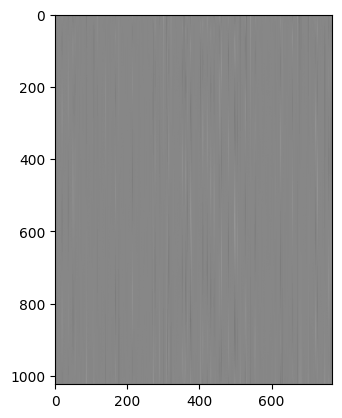

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(sd_hf["transformer.wpe.weight"],cmap='gray')

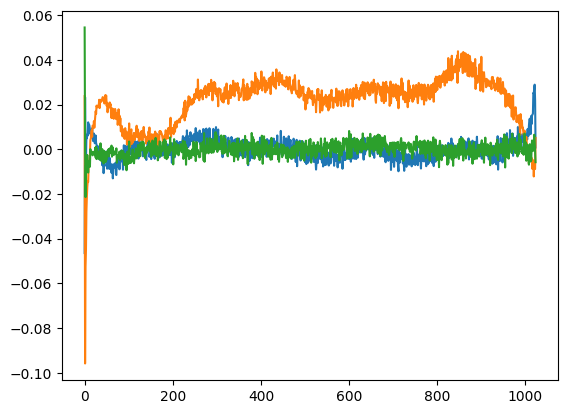

In [7]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])
plt.plot(sd_hf["transformer.wpe.weight"][:,767])

In [8]:
from transformers import set_seed , pipeline
generator=pipeline('text-generation',model='gpt2')
set_seed(42)
generator("Hello I am a large language model ",max_length=30,num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello I am a large language model !!\n\n\nI have been working on this for a long time, and it hasn't really changed much since then. I am now able to write for a few languages (GCC, C++, Java, etc.), and it's pretty easy to work with.\n\n\nI would really like to see more languages that come with a built-in C++ compiler, but it could be more difficult to write. I really like the feature set of the language model - it has allowed me to get around the problem of code switching between languages, and has given me a lot more freedom and freedom to write programming languages.\n\n\nI really like the idea of writing in C++, and I think the language model is a great way to do that. I love the idea of writing in BASIC, and I love that it supports C++, so I think it's really great.\n\n\nI am using Python and PHP, both of which are great to work with, and I find Python and PHP to be really cool.\n\n\nI am working with a large number of languages, and I would really like to se

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-07-30 06:17:57--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2025-07-30 06:17:57 (19.5 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [1]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
from dataclasses import dataclass
import torch
import math
import torch.nn as nn
from torch.nn import functional as F

#----------------------------------------------------------------
#Multi head attention
class CausalSelfAttention(nn.Module):
    
    def __init__(self,config):
        super().__init__()
        assert config.n_embed % config.n_head == 0 
        # key , query , value projections for all heads but in  a batch
        self.c_attn = nn.Linear(config.n_embed,3*config.n_embed)

        # output projection

        self.c_proj = nn.Linear(config.n_embed,config.n_embed)
        self.c_proj.NANOGPT_SCALE_INIT = 1

        # regularization
        self.n_head  = config.n_head
        self.n_embed = config.n_embed

        #not really a 'bias' , but more of a mask , following the openAI/ HF naming though

        self.register_buffer("bias",torch.tril(torch.ones(config.block_size,config.block_size))
                             .view(1,1,config.block_size,config.block_size))

    def forward(self,x):
        B,T,C = x.size() # batch size, sequence length , embedding dimensionality(n_embed)
        # calculate query , key , values for all heads in a batch and move head forward to the batch
        #nh is the "number of heads", hs is "head size" and C(number of channels) = nh * hs
        #e.g in GPT-2(124 million), n_heads=12 , hs = 64 , so nh* hs = C = 768 channels in transformers

        qkv = self.c_attn(x)
        q , k , v = qkv.split(self.n_embed,dim=2)

        k = k.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B,nh,T,hs)
        q = q.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B,nh,T,hs)
        v = v.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B,nh,T,hs)

        # we want pytorch to treat (B, nh) as batch dimensions so that parallel processing takes place

        # attention(materializes the large (T,T) matrix for all queries and keys)
        # att = (q @ k.transpose(-2,-1)) * (1.0/math.sqrt(k.size(-1))) # dividing by head size so that the gradients dont saturate
        # att = att.masked_fill(self.bias[:,:,:T,:T] == 0,float('-inf'))  # auto regressive mask that makes sure that the tokens only attend to tokens before them , never to tokens after them
        # att = F.softmax(att,dim=-1)
        # y   = att @ v # (B,nh,T,T) * (B,nh,T,hs) --> (B, nh , T, hs)

        #flash attention is a kernel fusion algorithm that is mindful of memory hierarchy
        # fewer read/writes to the HBM. Flash Attention does not read/write the large N*N attention matrix to HBM

        y = F.scaled_dot_product_attention(q , k , v , is_causal = True) #flash attention
        
        y   = y.transpose(1,2).contiguous().view(B,T,C) # reassemble all the heads side by side

        #output projection
        y=self.c_proj(y)
        return y
        
        




# dead neuron problem which happens in ReLU does not happen in GeLU,in the flat tail of ReLU , 
#gradients saturate(no change or development of network) , whereas in GeLU, it always contribute local gradient

class MLP(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embed,4*config.n_embed)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4*config.n_embed,config.n_embed)
        self.c_proj.NANOGPT_SCALE_INIT  = 1 

    def forward(self,x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x
    
class Block(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embed)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embed)
        self.mlp  = MLP(config)

    # the entire block is map-reduce
    def forward(self,x):
        x = x + self.attn(self.ln_1(x)) # Reduce phase (communication,aggregation,reduction)
        x = x + self.mlp(self.ln_2(x))  # Mapping phase (computation)
        return x



@dataclass
class GPTConfig:
    block_size : int = 1024  # max sequence length (number of previous tokens a token can attend to)
    vocab_size : int = 50257 # number of tokens : 50,000 BPE merges + 256 bytes tokens + 1 <|endoftokens|>
    n_layer    : int = 12    # number of layers
    n_head     : int = 12    # number of heads
    n_embed    : int = 768   # embedding dimension

class GPT(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.config=config

        self.transformer=nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size,config.n_embed),
            wpe = nn.Embedding(config.block_size,config.n_embed),
            h   = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f=nn.LayerNorm(config.n_embed),
        ))
        self.lm_head=nn.Linear(config.n_embed,config.vocab_size,bias=False)

        # weight tying/ parameter sharing scheme
        #PyTorch's nn.Linear was designed for efficiency, and it stores the weight matrix in a "transposed" form.
        #During the forward pass, the input x is multiplied by the transpose of the stored weight matrix
        # these two embeddings should share similarity between the tokens
        self.transformer.wte.weight = self.lm_head.weight # copies the data pointer or reference

        #init params
        self.apply(self._init_weights)
        
    def _init_weights(self,module): # initializing weight according to what is happening GPT2 source code 
        
        if isinstance(module,nn.Linear):
            std = 0.02
            if hasattr(module,'NANOGPT_SCALE_INIT'):
                std *= (2*self.config.n_layer) ** -0.5
            torch.nn.init.normal_(module.weight, mean= 0.0,std = std)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module,nn.Embedding):
            torch.nn.init.normal_(module.weight,mean = 0.0 , std = 0.02)
    def forward(self,idx,targets=None):
        # idx is of shape (B,T)
        B,T = idx.size()
        assert T <= self.config.block_size , f" Cannot forward sequence of length {T} block size is 1024"
        #forward the token and position embedding

        pos = torch.arange(0,T,dtype=torch.long,device=idx.device) #shape(T)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (T,n_embed)
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (B,T,n_embed)
        x = pos_emb + tok_emb

        #forward the blocks of the transformer
        for block in self.transformer.h:
            x=block(x)

        #forward the final layernorm and the classifier
        x = self.transformer.ln_f(x)
        loss=None
        logits = self.lm_head(x) # (B,T, vocab_size)
        if targets is not None:
            loss=F.cross_entropy(logits.view(-1,logits.size(-1)),targets.view(-1))
            
        return logits , loss
        
    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embed=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embed=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embed=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embed=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model


import tiktoken
class DataLoaderLite:
    
    def __init__(self,B,T):
        self.B = B
        self.T = T

        # at init load tokens from the disk and store them in memory
        with open('input.txt','r') as f:
            text = f.read()

        enc = tiktoken.get_encoding('gpt2')
        tokens = enc.encode(text) # tokens are getting loaded on CPU, to be more efficient
        self.tokens = torch.tensor(tokens)
        print(f"loaded {len(self.tokens)} token")
        print(f"1 epoch = {len(self.tokens) // (B*T)} batches")
        #state
        self.current_position = 0
     
    def next_batch(self):
        
        B,T = self.B,self.T
        buf = self.tokens[self.current_position:self.current_position + B*T+1]
        x   = (buf[:-1]).view(B,T) #inputs
        y   = (buf[1:]).view(B,T)  #targets
        #advance the position in the tensor
        self.current_position += B*T
        #if loading the next batch would be out of bounds, reset
        if self.current_position + (B*T+1) > len(self.tokens):
            self.current_position = 0
        return x,y
         
            
# -------------------------------------------------------------------------------
#attempt to autodetect the device
import time
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif hasattr(torch.backends,"mps") and torch.backends.mps.is_available():
    device = 'mps'

print(f"using device:{device}")
torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)
# -------------------------------------------------------------------------------

train_loader = DataLoaderLite(B = 4 , T = 512)

torch.set_float32_matmul_precision('high')

# model=GPT.from_pretrained('gpt2') # loading the weights
model=GPT(GPTConfig()) # random model initialization
model.eval()
model.to(device)

#kernel fusion ( no unnecessary multiple round trips)
# only one round trip happens from the memory to the GPU chip where the actual computation happens 
# in case torch.compile is not used , multiple round trips will happen which will cause overhead
model = torch.compile(model) # speedup mainly comes from reducing Python overhead and GPU read/writes
# it will kind of compile the entire neural network with no python interpretter involved. It will compile it into
# a single object

#to perform some calculations we start streaming the data from the global memory (HBM) to the chip for computations
#operator fusion allows you to do a lot of computations on the chip before storing it back on the global memory which results in a huge amount of savings 

#optimize
optimizer = torch.optim.AdamW(model.parameters(),lr=3e-4)
for i in range(50):
    t0 = time.time()
    x , y = train_loader.next_batch()
    x , y = x.to(device) , y.to(device)
    optimizer.zero_grad() # always start with zero gradient
    # because .backwards deposit gradients  , it accumulates so start with zero gradients
    with torch.autocast(device_type=device , dtype = torch.bfloat16):  # we will not use float16 , because then we will have to use gradient scalars 
        #parameters are in torch.float32 , but activations and logits are in bfloat16
        #only matrix multiply like operations are converted to bfloat16
        #matrix multiply are fairly robust to precision changes
        logits , loss = model(x,y)
        # import code ; code.interact(local=locals())
    loss.backward()
    optimizer.step()
    torch.cuda.synchronize() # what happens basically is CPU schedules GPU to run on a particular task, it basically
    # assigns  a task to GPU and CPU just speeds through it
    # we basically wait for the GPU to finish executing its task
    t1 = time.time()
    dt = (t1-t0)*1000 # time  
    tokens_per_second = (train_loader.B * train_loader.T) / (t1-t0)
    print(f"step {i} , loss:{loss.item()},dt:{dt:.2f}ms, tok/sec : {tokens_per_second:.2f}")
print(loss)


--2025-07-30 11:12:57--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2025-07-30 11:12:57 (55.8 MB/s) - ‘input.txt’ saved [1115394/1115394]



ModuleNotFoundError: No module named 'tiktoken'

In [11]:
enc    = tiktoken.get_encoding('gpt2')
tokens = enc.encode("Hello, I'm a language model")
tokens = torch.tensor(tokens,dtype=torch.long) # (8,)
tokens = tokens.unsqueeze(0).repeat(num_return_sequences,1) # (5,8)
x=tokens.to(device)

#generate! right now x is (B,T) where B = 5, T = 8

# set the seed to 42

torch.manual_seed(42)
torch.cuda.manual_seed(42)

while x.size(1) < max_length:
    # forward the model to get the logits
    with torch.no_grad(): # pytorch does not have to cache intermediate tensors , do not prepare in any way for 
        #potential backpropagation
        logits = model(x) # (B,T,vocab_size)
        #take the logits at the last position
        logits = logits[:,-1,:] # (B,vocab_size)
        #get the probabilities
        probs  = F.softmax(logits,dim=-1)
        # do top-k sampling of 50 ( hugging face pipeline default)
        # topk_probs here becomes (5,50), topk_indices is (5,50)
        topk_probs , topk_indices = torch.topk(probs,50,dim=-1)
        # select a token from top-k probabilities
        ix = torch.multinomial(topk_probs,1) # (B,1)

        # gather the corresponding indices
        xcol = torch.gather(topk_indices,-1,ix) # (B,1)

        # append to the sequence
        x = torch.cat((x,xcol),dim = 1)


#print the generated text
for i in range(num_return_sequences):
    tokens  = x[i,:max_length].tolist()
    decoded = enc.decode(tokens)
    print(">",decoded)

print('did not crash ')


NameError: name 'num_return_sequences' is not defined

In [12]:
# standard deviation grows inside the residual stream
#Every single block of residual network contribute some amount and it gets added 
# what happens is that the variance of activation grows in residual network
x = torch.zeros(768)
n = 100 # e.g. 100 layers
for i in range(n):
    x+=torch.randn(768) * n**-0.5 # scaling by a factor of 1/sqrt(n) to control the growth of activations

print(x.std())

tensor(0.9782)


In [ ]:
# INT8 is used for inference not for training 
# INT8 has uniform spacing so we prefer FLOAT so that we can get a better match to the normal distribution that 
# occur during the training of the neural network where both activations and weights are distributed as normal distribution
# floating points are really important to match that distribution


# Tensor core is just an instruction in the A100 architecture

# TF32 is bit more approximate compared to FP32 
# what happens is basically that mantissa part in TF32 has 10 bits compared to the mantissa part in FP32

# in A100 architecture matrix multiplication is just divided instruction wise in 4*4 matrix multiplication
# when we shift from FP32 --> TF32 we are doing the multiplication in TF32 , but everything else is FP32 
# its FP32 numbers that are shifted everywhere through the memory , system . We are memory bound 